In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd


In [5]:
alphabets= pd.read_csv('Alphabets_data.csv')
alphabets.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
alphabets.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [12]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load the alphabets dataset using pandas to handle mixed data types
dataset = pd.read_csv("Alphabets_data.csv")
# Extract features (X) and target variable (Y)
X = dataset.iloc[:, 1:6].values  # Assuming columns 1-5 are features (xbox, ybox, etc.)
Y = dataset.iloc[:, 0].values    # Assuming column 0 is the target variable (letter)

# If you need X and Y to be numpy arrays, you can convert them
X = X.astype(float)  # Assuming your features are numeric

# If 'letter' column needs to be numerical, encode it using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [16]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='uniform', activation='relu')) # Changed 'init' to 'kernel_initializer'
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) # Changed 'init' to 'kernel_initializer'
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) # Changed 'init' to 'kernel_initializer'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Fit the model
# Replace 'nb_epoch' with 'epochs'
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0392 - loss: -3.2698 - val_accuracy: 0.0361 - val_loss: -14.9095
Epoch 2/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0370 - loss: -18.5977 - val_accuracy: 0.0361 - val_loss: -30.0925
Epoch 3/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0423 - loss: -33.9403 - val_accuracy: 0.0361 - val_loss: -45.1419
Epoch 4/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0386 - loss: -49.1331 - val_accuracy: 0.0361 - val_loss: -60.1902
Epoch 5/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0380 - loss: -64.8442 - val_accuracy: 0.0361 - val_loss: -75.2387
Epoch 6/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0419 - loss: -78.6378 - val_accuracy: 0.0361 - val_loss: -90.3934
Epoch 7/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0359 - loss: -94.1505 - val_accuracy: 0.0361 - val_loss: -105.4693
Epoch 8/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

In [20]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0400 - loss: -2245.6821
compile_metrics: 3.83%


In [21]:
# Visualize training history

# list all data in history
model.history.history.keys()


dict_keys([])

Epoch 1/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0388 - loss: -2279.9761 - val_accuracy: 0.0361 - val_loss: -2279.8330
Epoch 2/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0376 - loss: -2280.6008 - val_accuracy: 0.0361 - val_loss: -2294.9326
Epoch 3/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0433 - loss: -2306.8625 - val_accuracy: 0.0361 - val_loss: -2310.0103
Epoch 4/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0357 - loss: -2323.9204 - val_accuracy: 0.0361 - val_loss: -2325.1121
Epoch 5/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0409 - loss: -2318.7202 - val_accuracy: 0.0361 - val_loss: -2340.2297
Epoch 6/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0409 - loss: -2360.1636 - val_accuracy: 0.0361 - val_loss: -2355.3279
Epoch 7/150
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0366 - loss: -2373.0708 - val_accuracy: 0.0361 - val_loss: -2370.4121
Epoch 8/150
1340/1340 ━━━━━

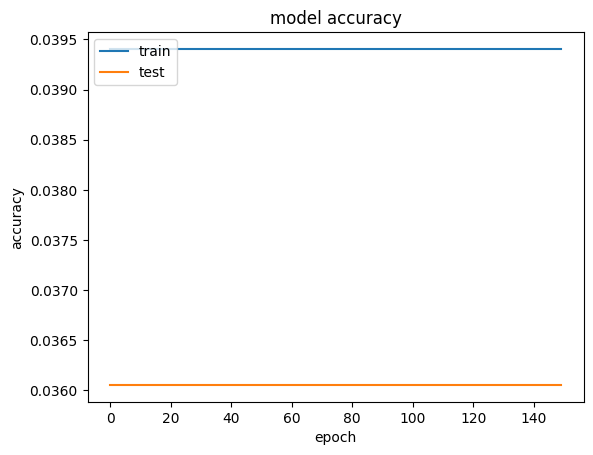

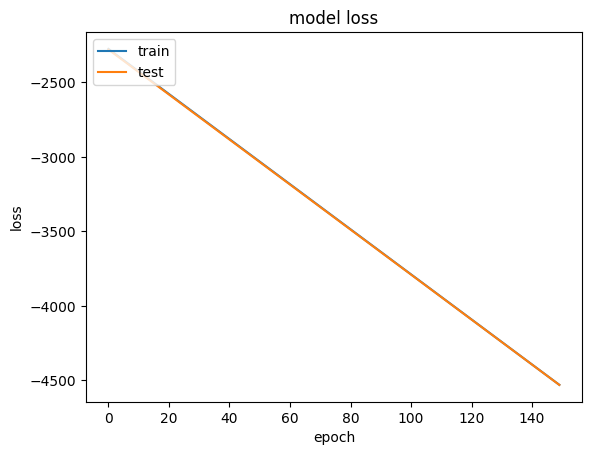

In [22]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
# Replace 'nb_epoch' with 'epochs'
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10) # Assign the output of fit to history

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Import the necessary library
import matplotlib.pyplot as plt

# Visualize training history

# list all data in history
print(history.history.keys())

# summarize history for accuracy
# Fit the model
# Replace 'nb_epoch' with 'epochs'
plt.plot(history.history['accuracy']) # Access history from history object
plt.plot(history.history['val_accuracy']) # Access history from history object
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss']) # Access history from history object
plt.plot(history.history['val_loss']) # Access history from history object
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ***HYPERPARAMETER TUNING***


In [24]:
# Standardization

import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler


a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [25]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,-1.030287e-16,3.659295e-17,-8.242296e-17,1.417533e-16,-1.003642e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.103087e+00,-2.129084e+00,-2.542463e+00,-2.375788e+00,-1.600550e+00
25%,-5.350039e-01,-6.159833e-01,-5.568812e-01,-6.069205e-01,-6.874762e-01
50%,-1.230945e-02,-1.074302e-02,-6.048579e-02,2.775132e-01,-2.309392e-01
75%,5.103850e-01,5.944973e-01,4.359097e-01,7.197301e-01,6.821347e-01
max,5.737329e+00,2.410218e+00,4.903469e+00,4.257465e+00,5.247504e+00


In [26]:
!pip install scikeras

# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
# Instead of importing KerasClassifier from tensorflow.keras.wrappers.scikit_learn:
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras.wrappers
from keras.optimizers import Adam


In [36]:
# create model
def create_model(input_shape=(8,)):  # Add input_shape argument
    model = Sequential()
    # Replace 'init' with 'kernel_initializer'
    model.add(Dense(12, input_shape=input_shape, kernel_initializer='uniform', activation='relu'))  # Use input_shape in the first layer
    model.add(Dense(8, kernel_initializer='uniform', activation='relu')) # Changed 'init' to 'kernel_initializer'
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) # Changed 'init' to 'kernel_initializer'

    # Replace 'lr' with 'learning_rate' in Adam optimizer
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0, input_shape=(5,)) # Pass the input shape here
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.040 total time=  32.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.037 total time=  27.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.037 total time=  25.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.043 total time=  31.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.039 total time=  31.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.040 total time= 2.4min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.037 total time= 2.5min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.037 total time= 2.4min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.043 total time= 2.2min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.039 total time= 2.4min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.040 total time= 4.8min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.037 total time= 4.9min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.037 total time= 4.6min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.043 total time= 4.5min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.039 total time= 4.5min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.040 total time=  13.7s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.037 total time=  15.3s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.037 total time=  14.9s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.043 total time=  14.9s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.039 total time=  14.4s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.040 total time= 1.2min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.037 total time= 1.1min
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.037 total time= 1.2min
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.043 total time= 1.1min
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.039 total time= 1.2min
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.040 total time= 2.3min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.037 total time= 2.2min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.037 total time= 2.2min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.043 total time= 2.3min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.039 total time= 2.3min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.040 total time=   7.1s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.037 total time=   8.4s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.037 total time=   7.3s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.043 total time=   8.6s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.039 total time=   8.3s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.040 total time=  33.8s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.037 total time=  35.0s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.037 total time=  34.8s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.043 total time=  34.1s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.039 total time=  33.5s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.040 total time= 1.2min
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.037 total time= 1.1min
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.037 total time= 1.1min
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.043 total time= 1.1min
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.039 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
